## Statements:
>the more subscribers the higher the rating

>rating rating might always be higher in some of the categories




# Import Essential Libraries

In [2]:
# Basic Libraries
import numpy as np
import pandas as pd
import seaborn as sb
import matplotlib.pyplot as plt # we only need pyplot
sb.set() # set the default Seaborn style for graphics

# Data Preparation

In [5]:
# Import the dataset -  Udemy Courses
rawcoursedata = pd.read_csv('../../Course_info.csv')
#select equired columns
SubCatPaid_raw = pd.DataFrame(rawcoursedata[['avg_rating','num_subscribers','subcategory','price','category']][rawcoursedata['price'] != 0])
# Convert all Variable Names to UPPERCASE
SubCatPaid_raw.columns = SubCatPaid_raw.columns.str.upper()
# To add suicide_rate column for prediction ('High' and 'Low')
SubCatPaid_raw['AVG_RATING'] = np.where(SubCatPaid_raw['AVG_RATING']>4, 'High', 'Low')
SubCatPaid_raw

,AVG_RATING,NUM_SUBSCRIBERS,SUBCATEGORY,PRICE,CATEGORY
0,Low,2231,Food & Beverage,24.99,Lifestyle
2,High,1713,Other Lifestyle,19.99,Lifestyle
3,High,4988,Pet Care & Training,199.99,Lifestyle
4,High,1266,Web Design,159.99,Design
5,High,20505,Yoga,29.99,Health & Fitness
...,...,...,...,...,...
209729,Low,3,Language Learning,19.99,Teaching & Academics
209730,Low,0,IT Certifications,49.99,IT & Software
209731,Low,0,IT Certifications,49.99,IT & Software
209732,Low,0,Other Finance & Accounting,119.99,Finance & Accounting


### remove outliers

<class 'str'>, NUM_SUBSCRIBERS => 20.0, 1065.0
[NUM_SUBSCRIBERS] total outliers: 28237
<class 'str'>, PRICE => 19.99, 109.99
[PRICE] total outliers: 10888


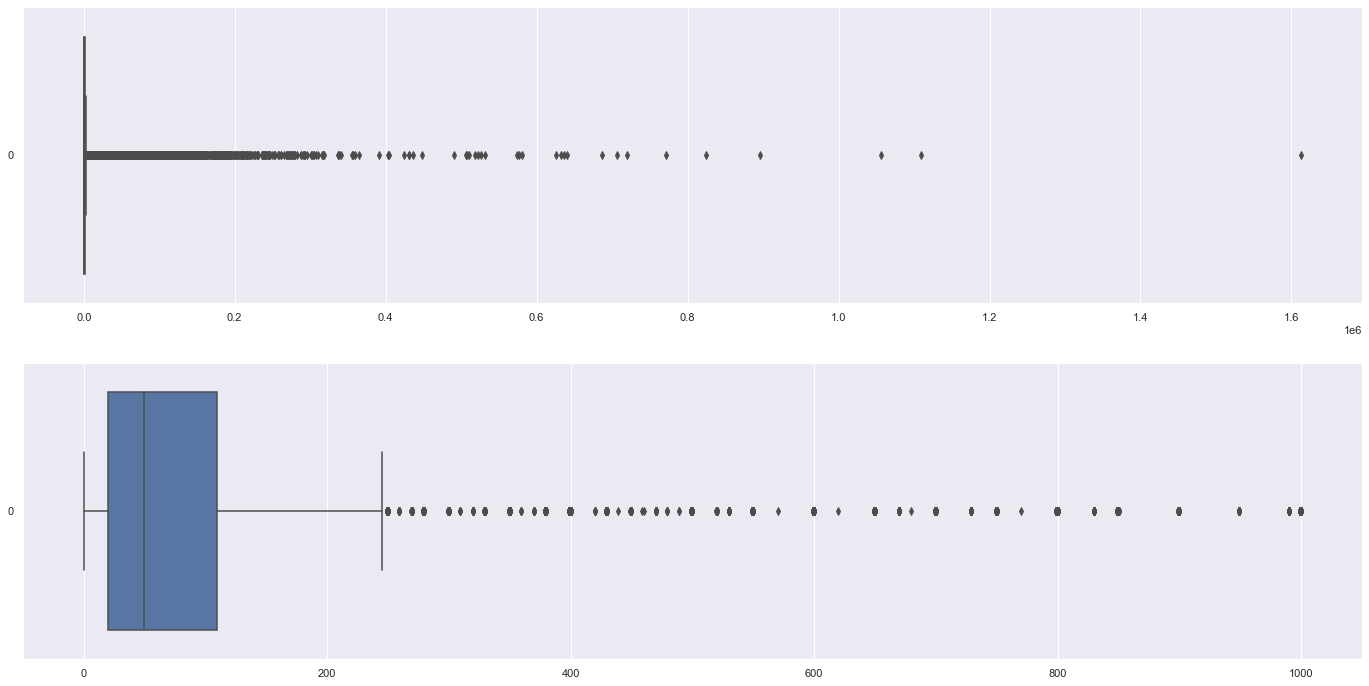

In [6]:
    f, axes = plt.subplots(2, 1, figsize=(24, 12))
    # Draw the Boxplots 
    sb.boxplot(data = SubCatPaid_raw.NUM_SUBSCRIBERS, orient = "h", ax = axes[0])
    sb.boxplot(data = SubCatPaid_raw.PRICE, orient = "h", ax = axes[1])

    column= 'NUM_SUBSCRIBERS'
    column_data: pd.DataFrame = SubCatPaid_raw[column]
    q1 = column_data.quantile(0.25)
    q3 = column_data.quantile(0.75)
    interquartile_range = q3-q1
    print(f"{type(column)}, {column} => {q1}, {q3}")
    lower_whisker = q1-1.5*interquartile_range
    upper_whisker = q3+1.5*interquartile_range
    outliers = sum( (column_data < lower_whisker) | (column_data > upper_whisker) )
    print(f"[{column}] total outliers: { outliers }")
    
    column= 'PRICE'
    column_data: pd.DataFrame = SubCatPaid_raw[column]
    q1 = column_data.quantile(0.25)
    q3 = column_data.quantile(0.75)
    interquartile_range = q3-q1
    print(f"{type(column)}, {column} => {q1}, {q3}")
    lower_whisker = q1-1.5*interquartile_range
    upper_whisker = q3+1.5*interquartile_range
    outliers = sum( (column_data < lower_whisker) | (column_data > upper_whisker) )
    print(f"[{column}] total outliers: { outliers }")
    

In [7]:
q1 = SubCatPaid_raw.quantile(0.25)
q3 = SubCatPaid_raw.quantile(0.75)
interquartile_range = q3-q1

lower_whisker = q1-1.5*interquartile_range
upper_whisker = q3+1.5*interquartile_range

outliers = ((SubCatPaid_raw < lower_whisker) | (SubCatPaid_raw > upper_whisker)).any(axis=1)
SubCatPaid_cleanup: pd.DataFrame = SubCatPaid_raw[~outliers]
print(f"Union outliers: {sum(outliers)}")
SubCatPaid_cleanup.head

Union outliers: 38024


<bound method NDFrame.head of        AVG_RATING  NUM_SUBSCRIBERS                 SUBCATEGORY   PRICE  \
0             Low             2231             Food & Beverage   24.99   
2            High             1713             Other Lifestyle   19.99   
4            High             1266                  Web Design  159.99   
9            High              483  Search Engine Optimization   99.99   
10           High              794            Teacher Training   49.99   
...           ...              ...                         ...     ...   
209729        Low                3           Language Learning   19.99   
209730        Low                0           IT Certifications   49.99   
209731        Low                0           IT Certifications   49.99   
209732        Low                0  Other Finance & Accounting  119.99   
209733        Low                0           IT Certifications   49.99   

                    CATEGORY  
0                  Lifestyle  
2                  

In [8]:
SubCatPaid_cleanup.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 149972 entries, 0 to 209733
Data columns (total 5 columns):
 #   Column           Non-Null Count   Dtype  
---  ------           --------------   -----  
 0   AVG_RATING       149972 non-null  object 
 1   NUM_SUBSCRIBERS  149972 non-null  int64  
 2   SUBCATEGORY      149972 non-null  object 
 3   PRICE            149972 non-null  float64
 4   CATEGORY         149972 non-null  object 
dtypes: float64(1), int64(1), object(3)
memory usage: 6.9+ MB


# Classification tree

In [36]:
# Import the necessary libraries
import pandas as pd
from sklearn.preprocessing import OneHotEncoder
ohe = OneHotEncoder()

# OneHotEncoding of categorical predictors (not the response)
master_cat = SubCatPaid_cleanup['CATEGORY']

ohe.fit(master_cat.values.reshape(-1, 1))
master_cat_ohe = pd.DataFrame(ohe.transform(master_cat.values.reshape(-1, 1)).toarray()
                                ,columns=ohe.get_feature_names([master_cat.name]))

# Check the encoded variables
master_cat_ohe.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 149972 entries, 0 to 149971
Data columns (total 13 columns):
 #   Column                         Non-Null Count   Dtype  
---  ------                         --------------   -----  
 0   CATEGORY_Business              149972 non-null  float64
 1   CATEGORY_Design                149972 non-null  float64
 2   CATEGORY_Development           149972 non-null  float64
 3   CATEGORY_Finance & Accounting  149972 non-null  float64
 4   CATEGORY_Health & Fitness      149972 non-null  float64
 5   CATEGORY_IT & Software         149972 non-null  float64
 6   CATEGORY_Lifestyle             149972 non-null  float64
 7   CATEGORY_Marketing             149972 non-null  float64
 8   CATEGORY_Music                 149972 non-null  float64
 9   CATEGORY_Office Productivity   149972 non-null  float64
 10  CATEGORY_Personal Development  149972 non-null  float64
 11  CATEGORY_Photography & Video   149972 non-null  float64
 12  CATEGORY_Teaching & Academics 

In [37]:
# Combining Numeric features with the OHE Categorical features
masterdata_num = SubCatPaid_cleanup[['NUM_SUBSCRIBERS']]
masterdata_res = SubCatPaid_cleanup[['AVG_RATING']]
masterdata_ohe = pd.concat([masterdata_num, master_cat_ohe, masterdata_res], 
                           sort = False, axis = 1).reindex(index=masterdata_num.index)

# Check the final dataframe
masterdata_ohe.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 149972 entries, 0 to 209733
Data columns (total 15 columns):
 #   Column                         Non-Null Count   Dtype  
---  ------                         --------------   -----  
 0   NUM_SUBSCRIBERS                149972 non-null  float64
 1   CATEGORY_Business              102804 non-null  float64
 2   CATEGORY_Design                102804 non-null  float64
 3   CATEGORY_Development           102804 non-null  float64
 4   CATEGORY_Finance & Accounting  102804 non-null  float64
 5   CATEGORY_Health & Fitness      102804 non-null  float64
 6   CATEGORY_IT & Software         102804 non-null  float64
 7   CATEGORY_Lifestyle             102804 non-null  float64
 8   CATEGORY_Marketing             102804 non-null  float64
 9   CATEGORY_Music                 102804 non-null  float64
 10  CATEGORY_Office Productivity   102804 non-null  float64
 11  CATEGORY_Personal Development  102804 non-null  float64
 12  CATEGORY_Photography & Video  

[Text(669.6, 1087.2, 'NUM_SUBSCRIBERS <= -0.619\ngini = 0.472\nsamples = 134974\nvalue = [83559, 51415]'),
 Text(334.8, 652.32, 'NUM_SUBSCRIBERS <= -0.626\ngini = 0.247\nsamples = 23493\nvalue = [3391, 20102]'),
 Text(167.4, 217.44000000000005, 'gini = 0.068\nsamples = 12823\nvalue = [452, 12371]'),
 Text(502.20000000000005, 217.44000000000005, 'gini = 0.399\nsamples = 10670\nvalue = [2939, 7731]'),
 Text(1004.4000000000001, 652.32, 'NUM_SUBSCRIBERS <= -0.6\ngini = 0.404\nsamples = 111481\nvalue = [80168, 31313]'),
 Text(837.0, 217.44000000000005, 'gini = 0.494\nsamples = 13723\nvalue = [7592, 6131]'),
 Text(1171.8, 217.44000000000005, 'gini = 0.382\nsamples = 97758\nvalue = [72576, 25182]')]

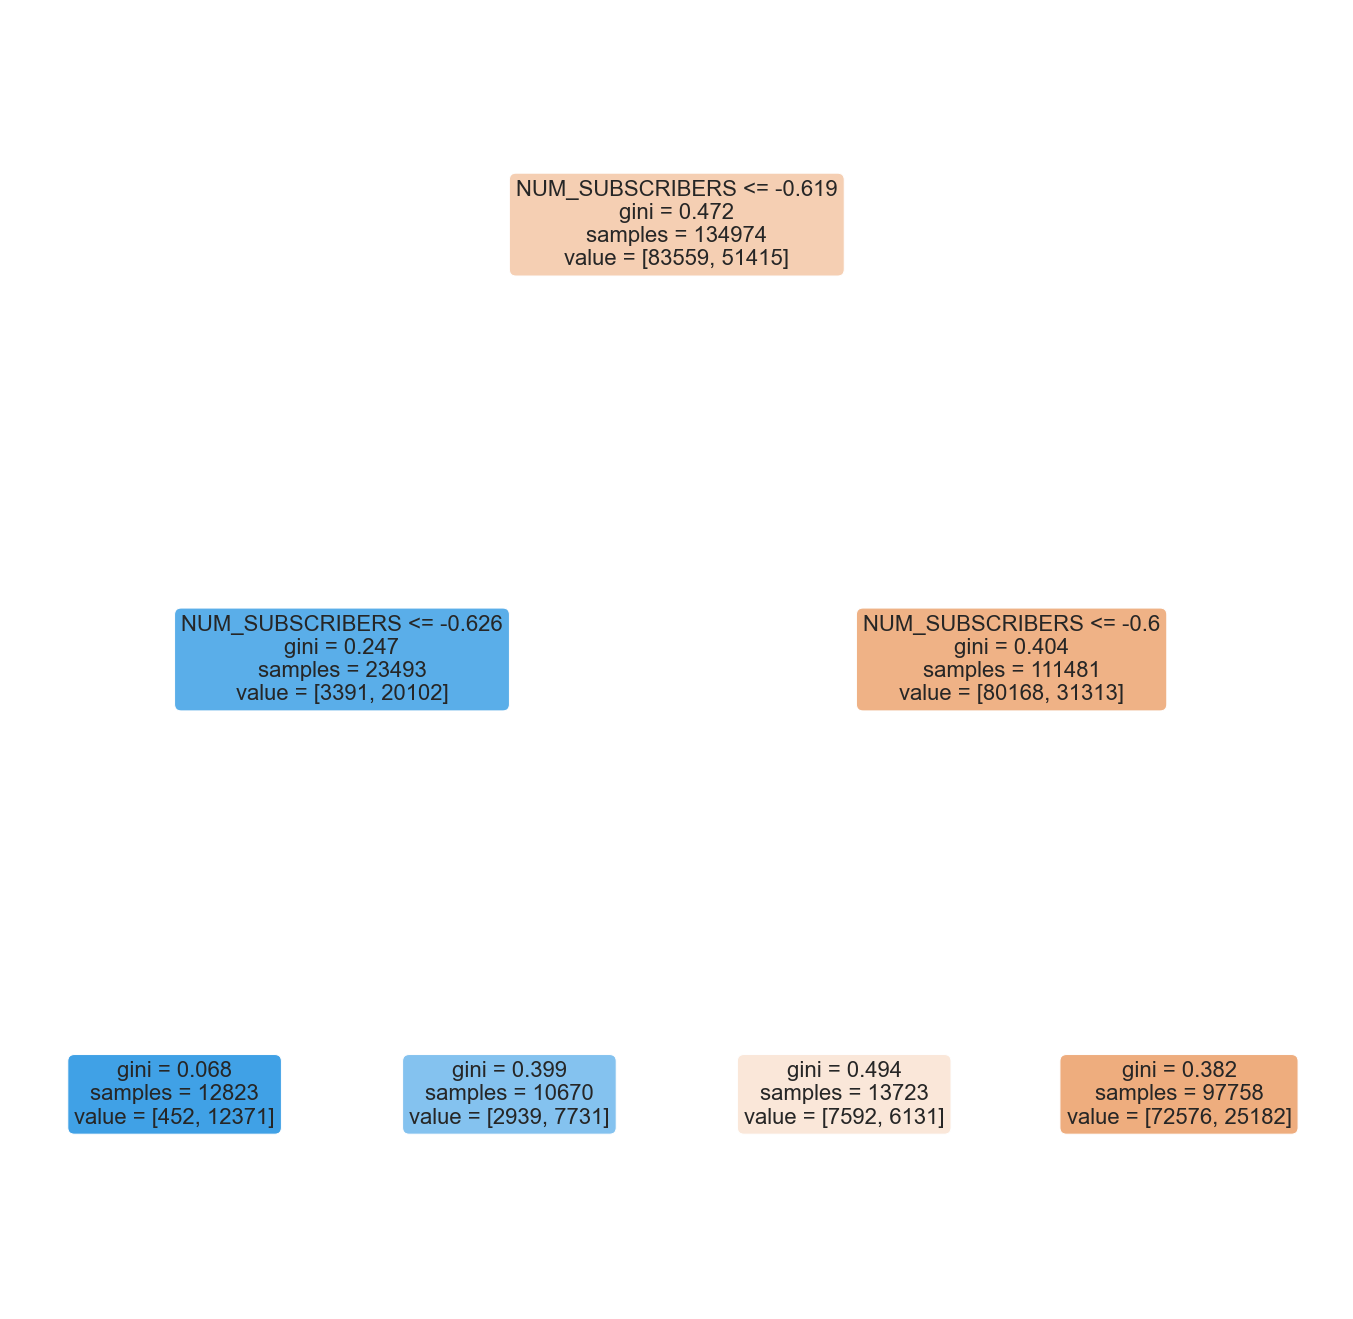

In [40]:
# Import essential models and functions from sklearn
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix
from sklearn.tree import plot_tree
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler

# Extract Response and Predictors
y = pd.DataFrame(masterdata_ohe['AVG_RATING'])
X = pd.DataFrame(masterdata_ohe.drop('AVG_RATING', axis=1))

# Split the Dataset into Train and Test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.1)

# Impute missing values with mean
imp_mean = SimpleImputer(strategy='mean')
X_train_imputed = imp_mean.fit_transform(X_train)
X_test_imputed = imp_mean.transform(X_test)

# Scale features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train_imputed)
X_test_scaled = scaler.transform(X_test_imputed)

# Decision Tree using Train Data
dectree = DecisionTreeClassifier(max_depth=2)  # change max_depth to experiment
dectree.fit(X_train_scaled, y_train)           # train the decision tree model

# Plot the trained Decision Tree
f = plt.figure(figsize=(24,24))
plot_tree(dectree, filled=True, rounded=True, feature_names=X.columns)
